In [96]:
import pandas as pd
resourceDf = pd.read_json("../data/resource.json") 
applicationDf = pd.read_json("../data/application.json")
paDf = pd.read_json("../data/productApplication.json")
serverDf = pd.read_json("../data/server.json")

In [97]:
serverResourceDf = resourceDf[
    resourceDf["type"].isin(['server','legacy-server','legacy-physical-server'])]

total_resource_count = serverResourceDf.shape[0]
total_server_count =serverDf.shape[0]
serverResourceDf.shape

(134009, 10)

In [98]:
import json
defaultPA = json.loads(paDf[paDf["name"]=='default'].to_json())
default_pa_id = defaultPA['_id']['0']['$oid']
print(default_pa_id)

61d3cd987d7ab1f2dc6bab0d


In [99]:
pd.set_option('mode.chained_assignment',  None) 

applicationDf["parentGroup"] = applicationDf["parentGroup"].apply(lambda x : x['_id']['$oid'])
applicationDf["_id"] = applicationDf["_id"].apply(lambda x : x['$oid'])
serverResourceDf["parentGroups"]= serverResourceDf["parentGroups"].apply(lambda x : x[0]['_id']['$oid'])

In [100]:
lookupServerApplicationDf = pd.merge(left = serverResourceDf , right = applicationDf, left_on='parentGroups', right_on='_id', how = "left" ,suffixes=["_resource","_application"])

In [101]:
non_default_pa_server = lookupServerApplicationDf[lookupServerApplicationDf["parentGroup"] != default_pa_id]
non_default_pa_server.dropna(axis=0,how='any',subset=["parentGroup","parentGroups"],inplace = True)
registered_server_count= non_default_pa_server.shape[0]
print(registered_server_count)

75323


([<matplotlib.patches.Wedge at 0x2ed7ed9a0>,
 [Text(-0.9396384184509591, 0.5719087711960541, 'server'),
  Text(0.5671396749622516, -0.9425245827476925, 'legacy_server'),
  Text(0.9744948091144697, -0.5102547079733349, 'legacy_physical_server')],
 [Text(-0.5125300464277959, 0.3119502388342113, '82.596%'),
  Text(0.3093489136157736, -0.5141043178623776, '2.050%'),
  Text(0.5315426231533471, -0.2783207498036372, '15.354%')])

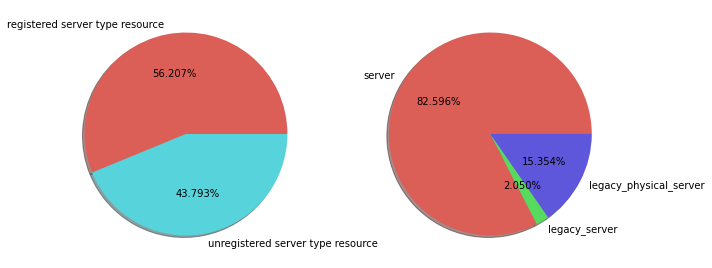

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
registered_server_count= non_default_pa_server.shape[0]
unregistered_server_count=total_resource_count-registered_server_count
values = [registered_server_count, unregistered_server_count]
labels = ["registered server type resource", "unregistered server type resource"]
colors = sns.color_palette('hls',len(labels))

plt.subplot(1,2,1)
plt.pie(values,labels=labels, autopct='%.3f%%', colors = colors, shadow=True)

server_count = non_default_pa_server[non_default_pa_server["type"]=="server"].shape[0]
legacy_server_count= non_default_pa_server[non_default_pa_server["type"]=="legacy-server"].shape[0]
legacy_physical_server_count=non_default_pa_server[non_default_pa_server["type"]=="legacy-physical-server"].shape[0]

values2 = [server_count,legacy_server_count,legacy_physical_server_count ]
labels2 = ["server", "legacy_server", "legacy_physical_server"]
colors2 = sns.color_palette('hls',len(labels2))

plt.subplot(1,2,2)
plt.pie(values2,labels=labels2, autopct='%.3f%%', colors = colors2, shadow=True)

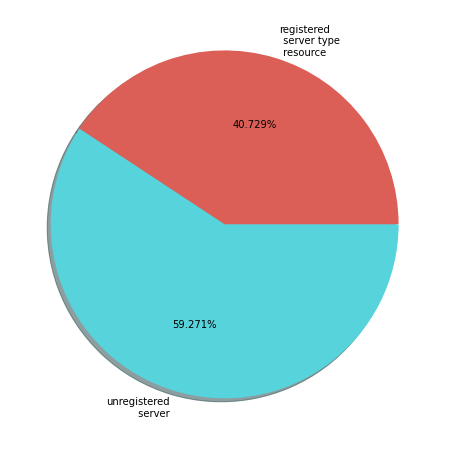

In [121]:
plt.figure(figsize=(10,8))

values3 = [registered_server_count, total_server_count-registered_server_count]
labels3 = ["registered\n server type\n resource", "unregistered\n server"]
colors3 = sns.color_palette('hls',len(labels))
result = plt.pie(values3,labels=labels3, autopct='%.3f%%', colors = colors3, shadow=True)

In [105]:
! git add .
! git commit -m "server filtering"
! git push origin master

[master 56bb81d] server filtering
 1 file changed, 39 insertions(+), 35 deletions(-)
Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 10 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 48.21 KiB | 9.64 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
To https://github.com/2jimoo/data_stastics
   32da986..56bb81d  master -> master


In [118]:
print(result[2][0].get_text())

40.729%


In [117]:
print(result)

([<matplotlib.patches.Wedge object at 0x4387f66d0>, <matplotlib.patches.Wedge object at 0x4eb6c50a0>], [Text(0.31587938347034805, 1.0536698795630408, 'registered\n server type\n resource'), Text(-0.31587938347034866, -1.0536698795630406, 'unregistered\n server')], [Text(0.17229784552928074, 0.5747290252162041, '40.729%'), Text(-0.17229784552928107, -0.574729025216204, '59.271%')])


In [119]:
print(result[1][0].get_text())

registered
 server type
 resource
